## TODO


- Add more evaluation variables
    - average cost-to-goal
- Get and plot optimal values
    - q values for each action and k_g-lambda combination (horizon?)
        - from it optimal action can be obtained
    - cost-to-goal for k_g-kambda combination (and horizon?)
    
    

In [1]:
import itertools
import json
import os
from collections import Counter
from pprint import pprint

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd
import seaborn as sns

import common

data_paths = ["../output/tireworld"]
data_files = [os.path.join(data_path, f) for data_path in data_paths for f in os.listdir(data_path) if not os.path.isdir(os.path.join(data_path, f))]

plt.style.use('default')

parameters = {
    'axes.labelsize': 20,
    'axes.titlesize': 22,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 18,
    'legend.title_fontsize': 18,
}
plt.rcParams.update(parameters)

In [2]:
data_files = common.get_data_files_from_paths(data_paths)
print(f"Found {len(data_files)} data files")

Found 1856 data files


In [3]:
def read_json(file_name):
    with open(file_name) as json_data:
        return json.load(json_data)        

In [4]:
def read_file_data(file_name):
    heuristics_spl = file_name.split('/')[0].split('_')
    return {
        **read_json(file_name),
        'output_file_name': file_name,
    }

In [5]:
info_runs = [read_file_data(file_name) for file_name in data_files]
len(info_runs)

1856

In [6]:
# get summary of parameters in different runs analyzed

problem_runs = common.filter_runs_by_props(info_runs, ("args.problem_index", 1))

params_values = {}
for run in problem_runs:
    for param, val in run['args'].items():
        if param not in params_values:
            params_values[param] = set()
        params_values[param].add(val)

params_values_strings = {param: json.dumps(sorted(list(values))) for param, values in params_values.items()}
df = pd.DataFrame(params_values_strings.values(), index=params_values_strings.keys())
df

,0
env,"[""PDDLEnvTireworld-v0""]"
problem_index,[1]
horizon,"[50, 100]"
n_rollouts,"[50, 100, 1000]"
n_rounds,[30]
n_sim_steps,[25]
exploration_constant,[1.414]
norm_exploration_constant,"[false, true]"
h_init_count,"[1, 20]"
k_g,"[1e-07, 0.01, 1.0]"


In [7]:
runs_by_envs = {}
for run in info_runs:
    if 'env' not in run:
        run['env'] = 'PDDLEnvTireworld-v0'
    env = run['env']
    if env not in runs_by_envs:
        runs_by_envs[env] = []
    runs_by_envs[env].append(run)


In [8]:
set([run['args']['lamb'] for run in runs_by_envs['PDDLEnvTireworld-v0']])

{-0.3, -0.25, -0.2, -0.1, 0.25}

# Optimal values

In [9]:
# optimal values

optimal_vals = {
    # key: problem index
    1: [
        (-0.3, 1e-7, ("movecar(l-2-1:location)", 0.04743879500927663, 0.5)),
        (-0.25, 1e-7, ("movecar(l-2-1:location)", 0.06980998532003882, 0.5)),
        (-0.2, 1e-7, ("movecar(l-2-1:location)", 0.10382409406696208, 1)),
        #
        (-0.3, 1e-2, ("movecar(l-2-1:location)", 0.052438795009276624, 0.5)),
        (-0.25, 1e-2, ("movecar(l-2-1:location)", 0.07480998532003882, 0.5)),
        (-0.2, 1e-2, ("movecar(l-2-1:location)", 0.11382399406696207, 1)),
        #
        (-0.3, 1, ("movecar(l-2-1:location)", 1.0343365960744917, 1)),
        (-0.25, 1, ("movecar(l-2-1:location)", 1.0595788684035934, 1)),
        (-0.2, 1, ("movecar(l-2-1:location)", 1.103823994066962, 1)),
    ],
}

optimal_actions_by_lamb_tireworld_1_1e7 = common.get_res_by_lamb(0, 1e-7, 1, optimal_vals)
optimal_qs_by_lamb_tireworld_1_1e7 = common.get_res_by_lamb(1, 1e-7, 1, optimal_vals)
optimal_probs_by_lamb_tireworld_1_1e7 = common.get_res_by_lamb(2, 1e-7, 1, optimal_vals)

optimal_actions_by_kg_tireworld_1_03 = common.get_res_by_kg(0, -0.3, 1, optimal_vals)
optimal_qs_by_kg_tireworld_1_03 = common.get_res_by_kg(1, -0.3, 1, optimal_vals)
optimal_probs_by_kg_tireworld_1_03 = common.get_res_by_kg(2, -0.3, 1, optimal_vals)

print(
    optimal_actions_by_lamb_tireworld_1_1e7, '\n',
    optimal_qs_by_lamb_tireworld_1_1e7, '\n',
    optimal_probs_by_lamb_tireworld_1_1e7, '\n',
    optimal_actions_by_kg_tireworld_1_03, '\n',
    optimal_qs_by_kg_tireworld_1_03, '\n',
    optimal_probs_by_kg_tireworld_1_03
)

{-0.3: 'movecar(l-2-1:location)', -0.25: 'movecar(l-2-1:location)', -0.2: 'movecar(l-2-1:location)'} 
 {-0.3: 0.04743879500927663, -0.25: 0.06980998532003882, -0.2: 0.10382409406696208} 
 {-0.3: 0.5, -0.25: 0.5, -0.2: 1} 
 {1e-07: 'movecar(l-2-1:location)', 0.01: 'movecar(l-2-1:location)', 1: 'movecar(l-2-1:location)'} 
 {1e-07: 0.04743879500927663, 0.01: 0.052438795009276624, 1: 1.0343365960744917} 
 {1e-07: 0.5, 0.01: 0.5, 1: 1}


In [10]:
kg_opt_probs = np.array([prob for k_g, prob in optimal_probs_by_lamb_tireworld_1_1e7.items()])
lamb_opt_probs = np.fromiter(optimal_probs_by_kg_tireworld_1_03.values(), dtype=float)
lamb_opt_qs = np.fromiter(optimal_qs_by_kg_tireworld_1_03.values(), dtype=float)
kg_opt_qs = np.fromiter(optimal_qs_by_lamb_tireworld_1_1e7.values(), dtype=float)


print(
    kg_opt_probs,
    lamb_opt_probs,
    lamb_opt_qs,
    kg_opt_qs,
)

[0.5 0.5 1. ] [0.5 0.5 1. ] [0.0474388 0.0524388 1.0343366] [0.0474388  0.06980999 0.10382409]


# Evaluate heuristics

In [11]:
# Parâmetros:
#       base_params -> parâmetros fixados
#       parâmetros das linhas -> o que vai ser variado em cada linha plotada no gráfico
#       variável fixa - cada plot representa um valor fixado dessa variável - ex: lambda
#       parâmetro x que varia -> o que vai aparecer no eixo x dos plots - ex: k_g
#       parâmetros de cada conjunto de plots - o eixo y do que vai ser mostrado nos plots.
#         Cada um é um conjunto de plots diferentes

In [12]:
# Evaluate heuristics

base_params = [("args.problem_index", 1), ("args.n_rollouts", 1000), ("args.h_init_count", 20), ("args.norm_exploration_constant", True), ("args.horizon", 100)]

h1_runs = common.filter_runs_by_props(info_runs, ("args.h_p", "h1"), ("args.h_u", "h1"), *base_params)
h1p_runs = common.filter_runs_by_props(info_runs, ("args.h_p", "h1"), ("args.h_u", "shortest_path"), *base_params)
h1u_runs = common.filter_runs_by_props(info_runs, ("args.h_p", "handcrafted"), ("args.h_u", "h1"), *base_params)
h_runs = common.filter_runs_by_props(info_runs, ("args.h_p", "handcrafted"), ("args.h_u", "shortest_path"), *base_params)

# check for intersection - shouldn't have any
# ----------------------------------------------------------------
common.check_for_intersections([
    h1_runs,
    h1p_runs,
    h1u_runs,
    h_runs
])
# ----------------------------------------------------------------

print(len(info_runs), len(h1_runs), len(h1p_runs), len(h1u_runs), len(h_runs))

1856 9 9 9 9


actions: ['movecar(l-1-2:location)', 'movecar(l-2-1:location)']
  sub[2]: [[7, 1, 1], [23, 29, 29]] 2 [0, 0, 0]
  sub[2]: [[4, 3, 0], [26, 27, 30]] 2 [0, 0, 0]
  sub[2]: [[4, 3, 1], [26, 27, 29]] 2 [0, 0, 0]
  sub[2]: [[3, 6, 0], [27, 24, 30]] 2 [0, 0, 0]
actions: ['movecar(l-1-2:location)', 'movecar(l-2-1:location)']
  sub[2]: [[7, 3, 2], [23, 27, 28]] 2 [0, 0, 0]
  sub[2]: [[4, 3, 1], [26, 27, 29]] 2 [0, 0, 0]
  sub[2]: [[4, 4, 0], [26, 26, 30]] 2 [0, 0, 0]
  sub[2]: [[3, 2, 1], [27, 28, 29]] 2 [0, 0, 0]
[[(array([1.e-07, 1.e-02, 1.e+00]), array([0.5, 0.5, 1. ]))],
 [(array([-0.3 , -0.25, -0.2 ]), array([0.5, 0.5, 1. ]))],
 [(array([1.e-07, 1.e-02, 1.e+00]), array([0.0474388, 0.0524388, 1.0343366]))],
 [(array([-0.3 , -0.25, -0.2 ]), array([0.0474388 , 0.06980999, 0.10382409]))]]
actions: ['movecar(l-1-2:location)', 'movecar(l-2-1:location)']


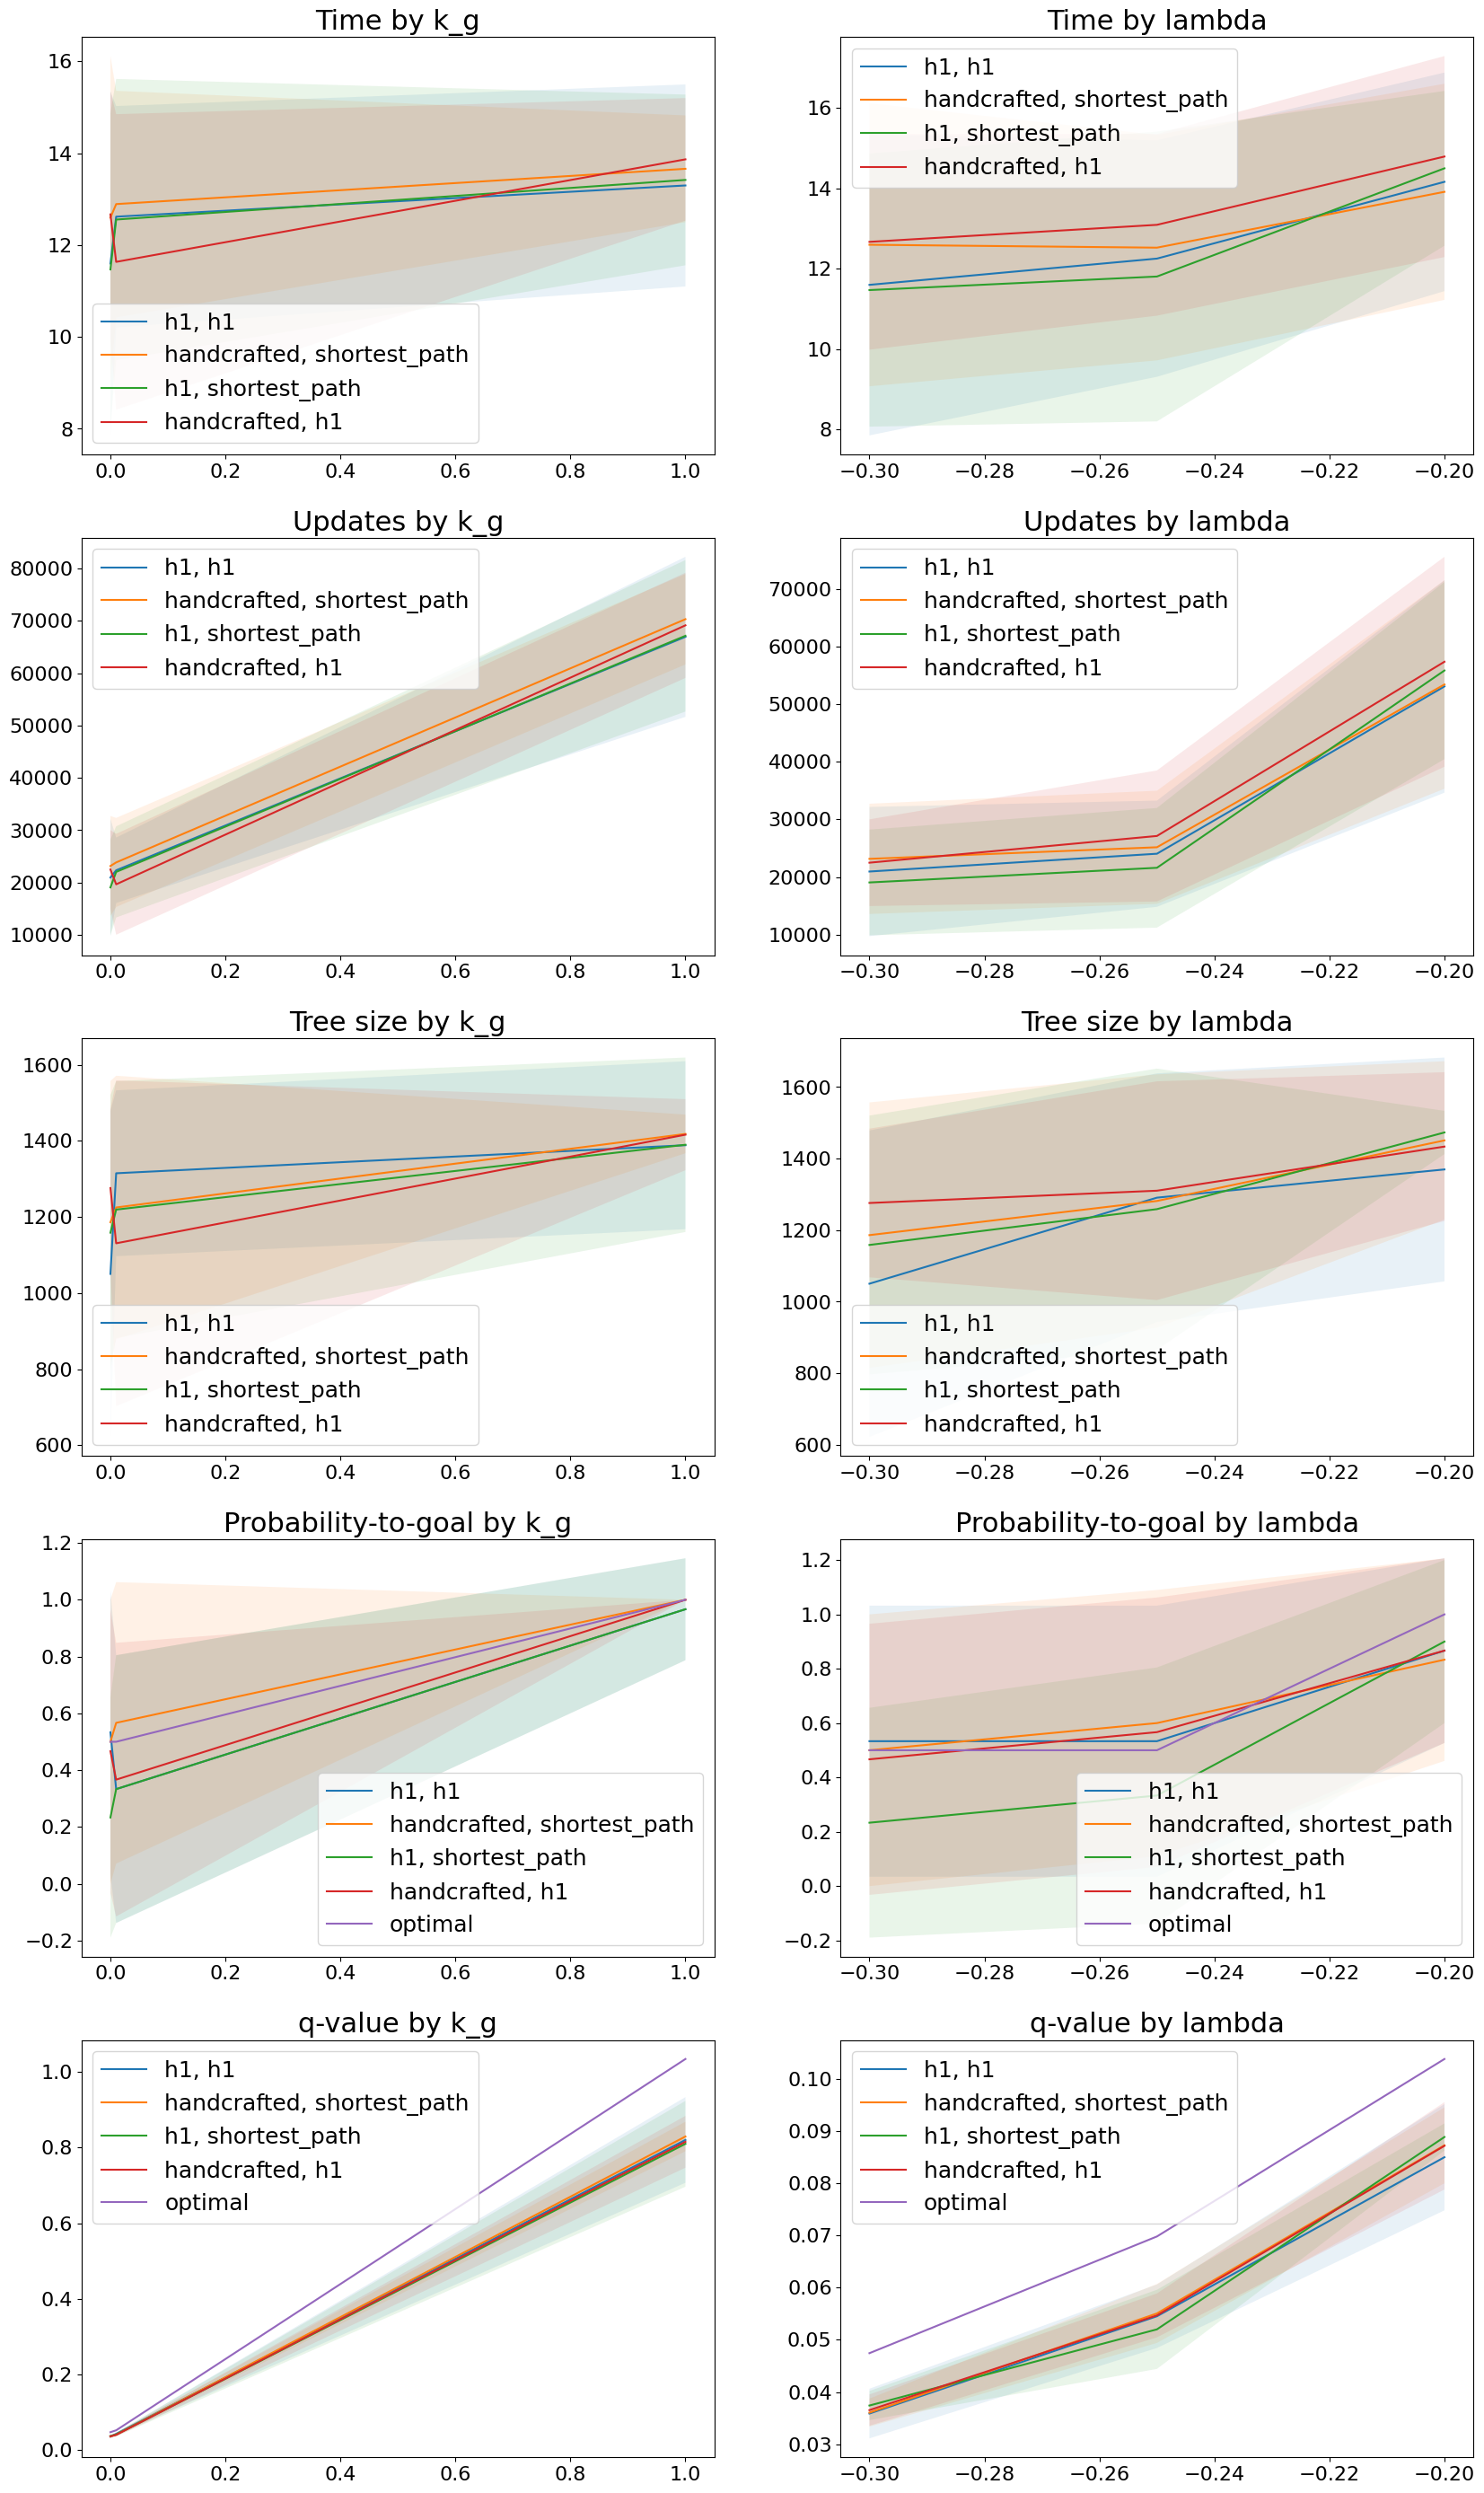

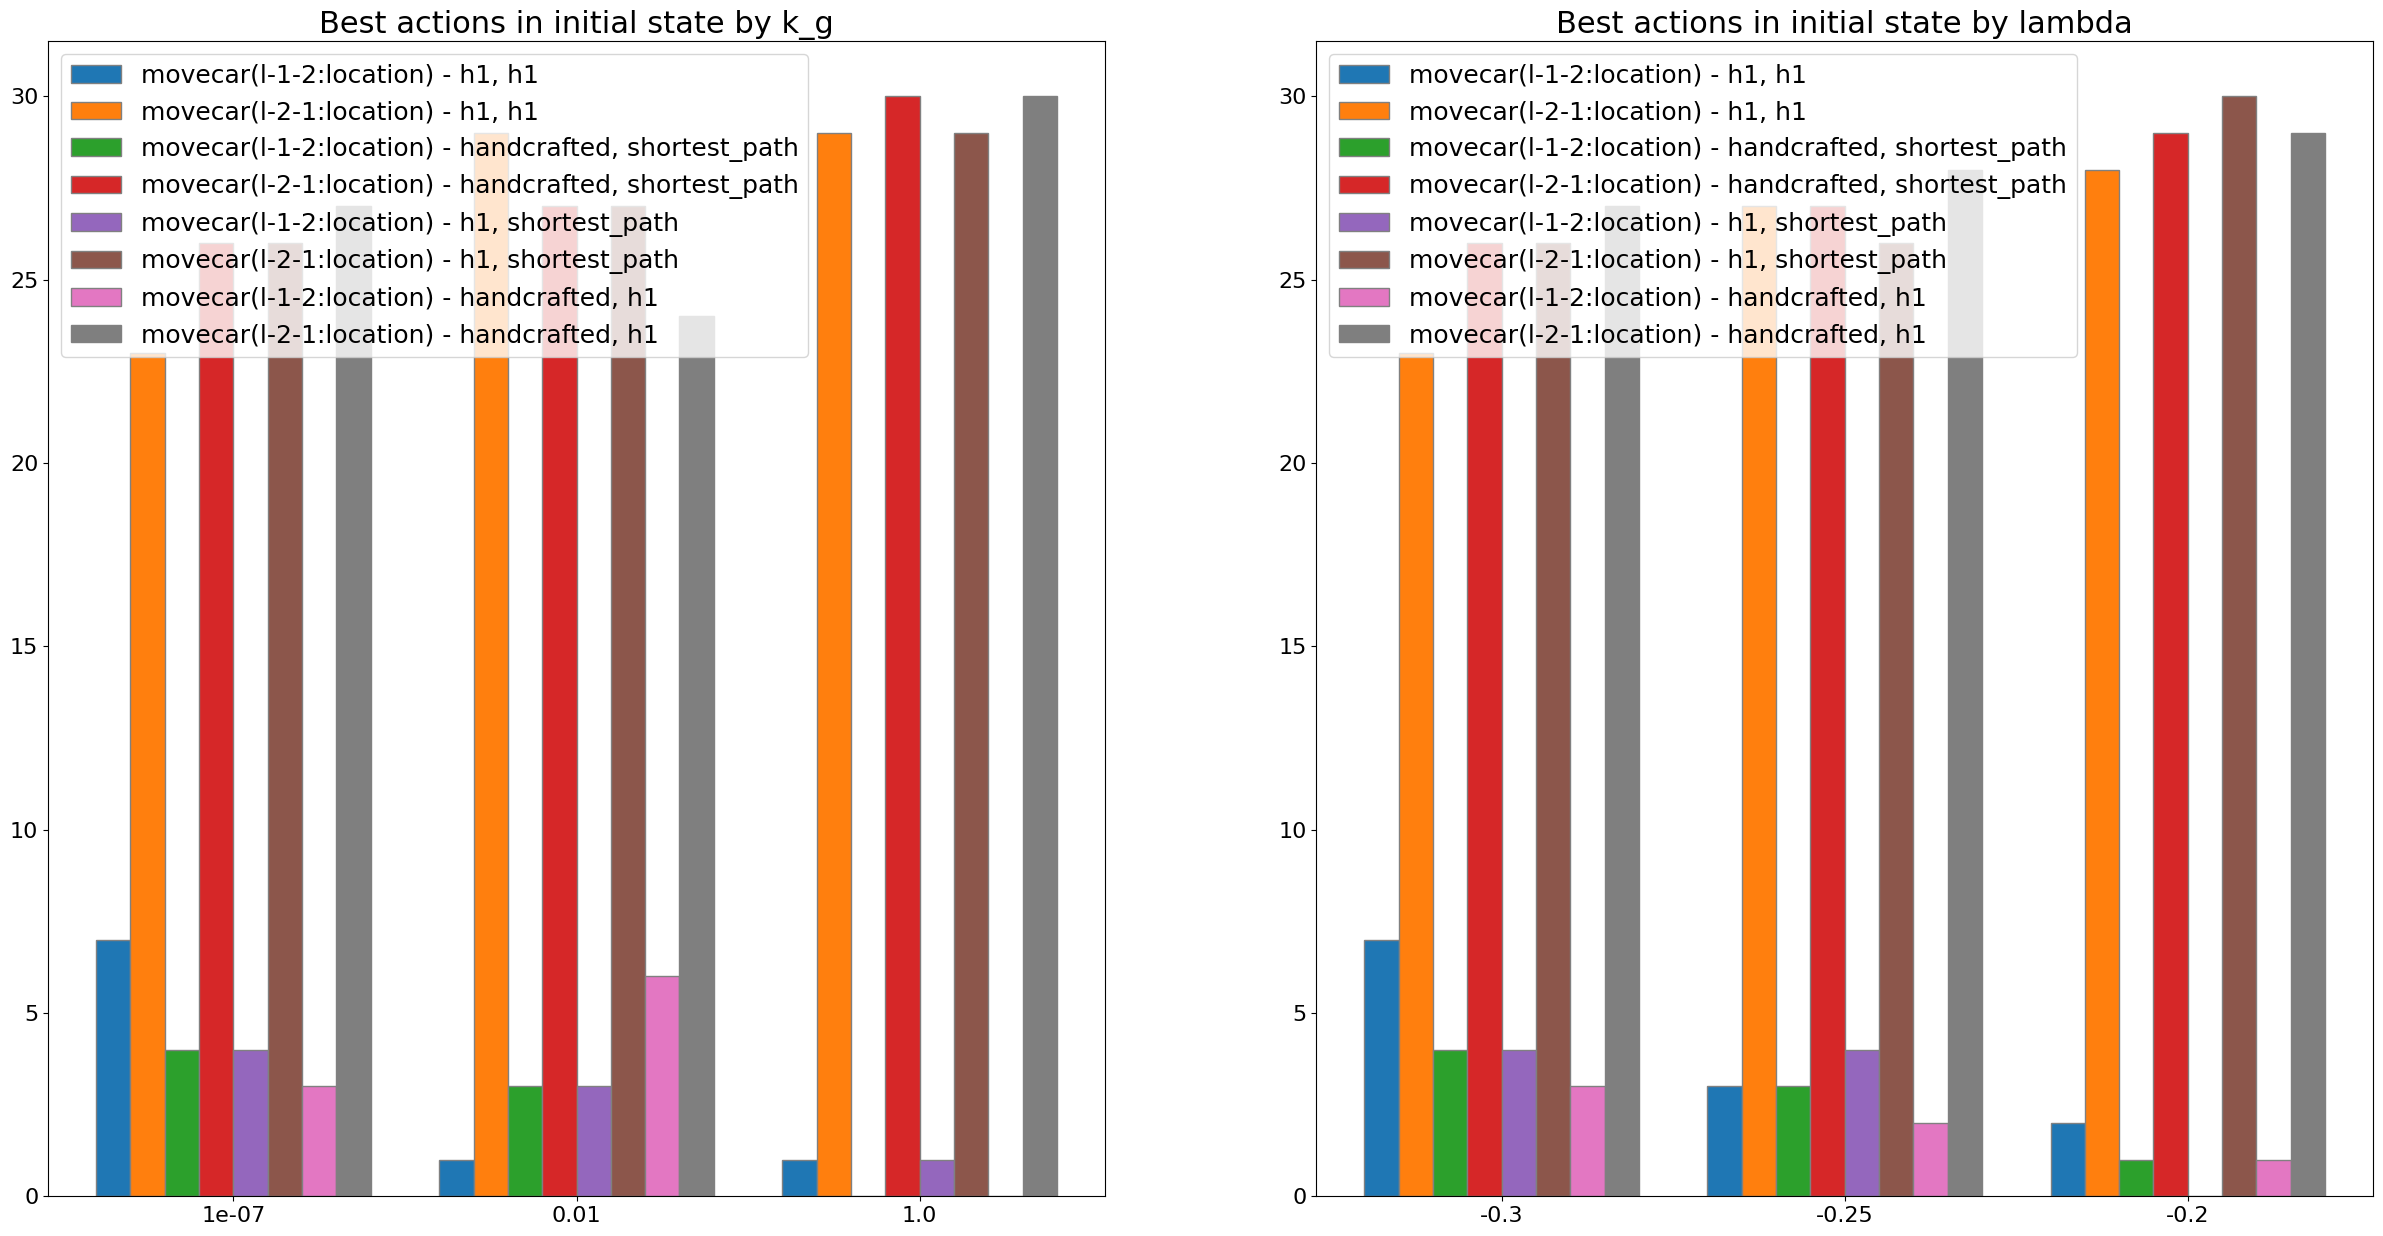

In [13]:
# fix k_g and leave lambda as variable
y_vars = [
    ("cpu_times", "line"),
    ("n_updates", "line"),
    ("tree_sizes", "line"),
    ("found_goal", "line"),
    ("values_s0", "line"),
    ("best_actions_s0", "bar")
]

source_runs = [
    h1_runs,
    h_runs,
    h1p_runs,
    h1u_runs,
]


plot_data_lamb = common.get_plot_data_by_fixed_var_from_sources(
    "args.lamb", -0.3,
    "args.k_g", y_vars,
    source_runs
)

(
    sources_lambda_fixed_time,
    sources_lambda_fixed_n_updates,
    sources_lambda_fixed_size,
    sources_lambda_fixed_prob,
    sources_lambda_fixed_q,
    _sources_lamb_best_actions
) = common.get_plot_source_from_plot_data(plot_data_lamb)
sources_lamb_best_actions = common.parse_best_actions_plot_source(_sources_lamb_best_actions)
# print("eita by kg")
# pprint(_sources_lamb_best_actions)
# print()
# pprint(sources_lamb_best_actions)
# print("eita fim")

plot_data_kg = common.get_plot_data_by_fixed_var_from_sources(
    "args.k_g", 1e-7,
    "args.lamb", y_vars,
    source_runs
)

(
    sources_kg_fixed_time,
    sources_kg_fixed_n_updates,
    sources_kg_fixed_size,
    sources_kg_fixed_prob,
    sources_kg_fixed_q,
    _sources_kg_best_actions
) = common.get_plot_source_from_plot_data(plot_data_kg)
sources_kg_best_actions = common.parse_best_actions_plot_source(_sources_kg_best_actions)

# print("eita by lamb")
# pprint(_sources_kg_best_actions)
# print()
# pprint(sources_kg_best_actions)
# print("eita fim")

labels = ["h1, h1", "handcrafted, shortest_path", "h1, shortest_path", "handcrafted, h1", "optimal"]

titles = [
    ["Time by k_g", "Time by lambda"],
    ["Updates by k_g", "Updates by lambda"],
    ["Tree size by k_g", "Tree size by lambda"],
    ["Probability-to-goal by k_g", "Probability-to-goal by lambda"],
    ["q-value by k_g", "q-value by lambda"]
]

pprint([
    [(sources_lambda_fixed_prob[-1][0], kg_opt_probs)],
    [(sources_kg_fixed_prob[-1][0], lamb_opt_probs)],
    [(sources_lambda_fixed_q[-1][0], lamb_opt_qs)],
    [(sources_kg_fixed_q[-1][0], kg_opt_qs)]
])

common.plot_multiple_from_plot_data_source_sets(
    [
        [sources_lambda_fixed_time, sources_kg_fixed_time],
        [sources_lambda_fixed_n_updates, sources_kg_fixed_n_updates],
        [sources_lambda_fixed_size, sources_kg_fixed_size],
        [
            sources_lambda_fixed_prob + [(sources_lambda_fixed_prob[-1][0], lamb_opt_probs)],
            sources_kg_fixed_prob + [(sources_kg_fixed_prob[-1][0], kg_opt_probs)]
        ],
        [
            sources_lambda_fixed_q + [(sources_lambda_fixed_q[-1][0], lamb_opt_qs)],
            sources_kg_fixed_q + [(sources_kg_fixed_q[-1][0], kg_opt_qs)]
        ]
    ],
    titles, labels, (5, 2), (20, 35), plot_type="line"
)

actions = _sources_kg_best_actions[0][1]
print("actions:", actions)
# Plot best actions at s0

labels = [
    'movecar(l-1-2:location) - h1, h1',
    'movecar(l-2-1:location) - h1, h1',
    'movecar(l-1-2:location) - handcrafted, shortest_path',
    'movecar(l-2-1:location) - handcrafted, shortest_path',
    'movecar(l-1-2:location) - h1, shortest_path',
    'movecar(l-2-1:location) - h1, shortest_path',
    'movecar(l-1-2:location) - handcrafted, h1',
    'movecar(l-2-1:location) - handcrafted, h1',
]
titles = [["Best actions in initial state by k_g", "Best actions in initial state by lambda"]]

common.plot_multiple_from_plot_data_source_sets(
    [[sources_lamb_best_actions, sources_kg_best_actions]],
    titles, [labels, labels], (1, 2), (30, 15), bar_width=0.1, plot_type="bar"
)


# Evaluate heuristic init weight

In [14]:
# Evaluate heuristics

base_params = [
    ("args.problem_index", 1),
    ("args.n_rollouts", 1000),
    ("args.norm_exploration_constant", True),
    ("args.horizon", 100),
    ("args.h_p", "handcrafted"),
    ("args.h_u", "shortest_path")
]

h_init_count_1_runs = common.filter_runs_by_props(info_runs, ("args.h_init_count", 1), *base_params)
h_init_count_20_runs = common.filter_runs_by_props(info_runs, ("args.h_init_count", 20), *base_params)

# check for intersection - shouldn't have any
# ----------------------------------------------------------------
common.check_for_intersections([
    h_init_count_1_runs,
    h_init_count_20_runs,
])
# ----------------------------------------------------------------

print(len(h_init_count_1_runs), len(h_init_count_20_runs))

9 9


actions: ['movecar(l-1-2:location)', 'movecar(l-2-1:location)']
  sub[2]: [[2, 4, 1], [28, 26, 29]] 2 [0, 0, 0]
  sub[2]: [[4, 3, 0], [26, 27, 30]] 2 [0, 0, 0]
eita by kg
[(array([1.e-07, 1.e-02, 1.e+00]),
  ['movecar(l-1-2:location)', 'movecar(l-2-1:location)'],
  [[2, 4, 1], [28, 26, 29]]),
 (array([1.e-07, 1.e-02, 1.e+00]),
  ['movecar(l-1-2:location)', 'movecar(l-2-1:location)'],
  [[4, 3, 0], [26, 27, 30]])]

[(array([1.e-07, 1.e-02, 1.e+00]),
  [[2, 4, 1], [28, 26, 29], [4, 3, 0], [26, 27, 30]])]
eita fim
actions: ['movecar(l-1-2:location)', 'movecar(l-2-1:location)']
  sub[2]: [[2, 1, 3], [28, 29, 27]] 2 [0, 0, 0]
  sub[2]: [[4, 3, 1], [26, 27, 29]] 2 [0, 0, 0]
eita by lamb
[(array([-0.3 , -0.25, -0.2 ]),
  ['movecar(l-1-2:location)', 'movecar(l-2-1:location)'],
  [[2, 1, 3], [28, 29, 27]]),
 (array([-0.3 , -0.25, -0.2 ]),
  ['movecar(l-1-2:location)', 'movecar(l-2-1:location)'],
  [[4, 3, 1], [26, 27, 29]])]

[(array([-0.3 , -0.25, -0.2 ]),
  [[2, 1, 3], [28, 29, 27], [4, 3, 1]

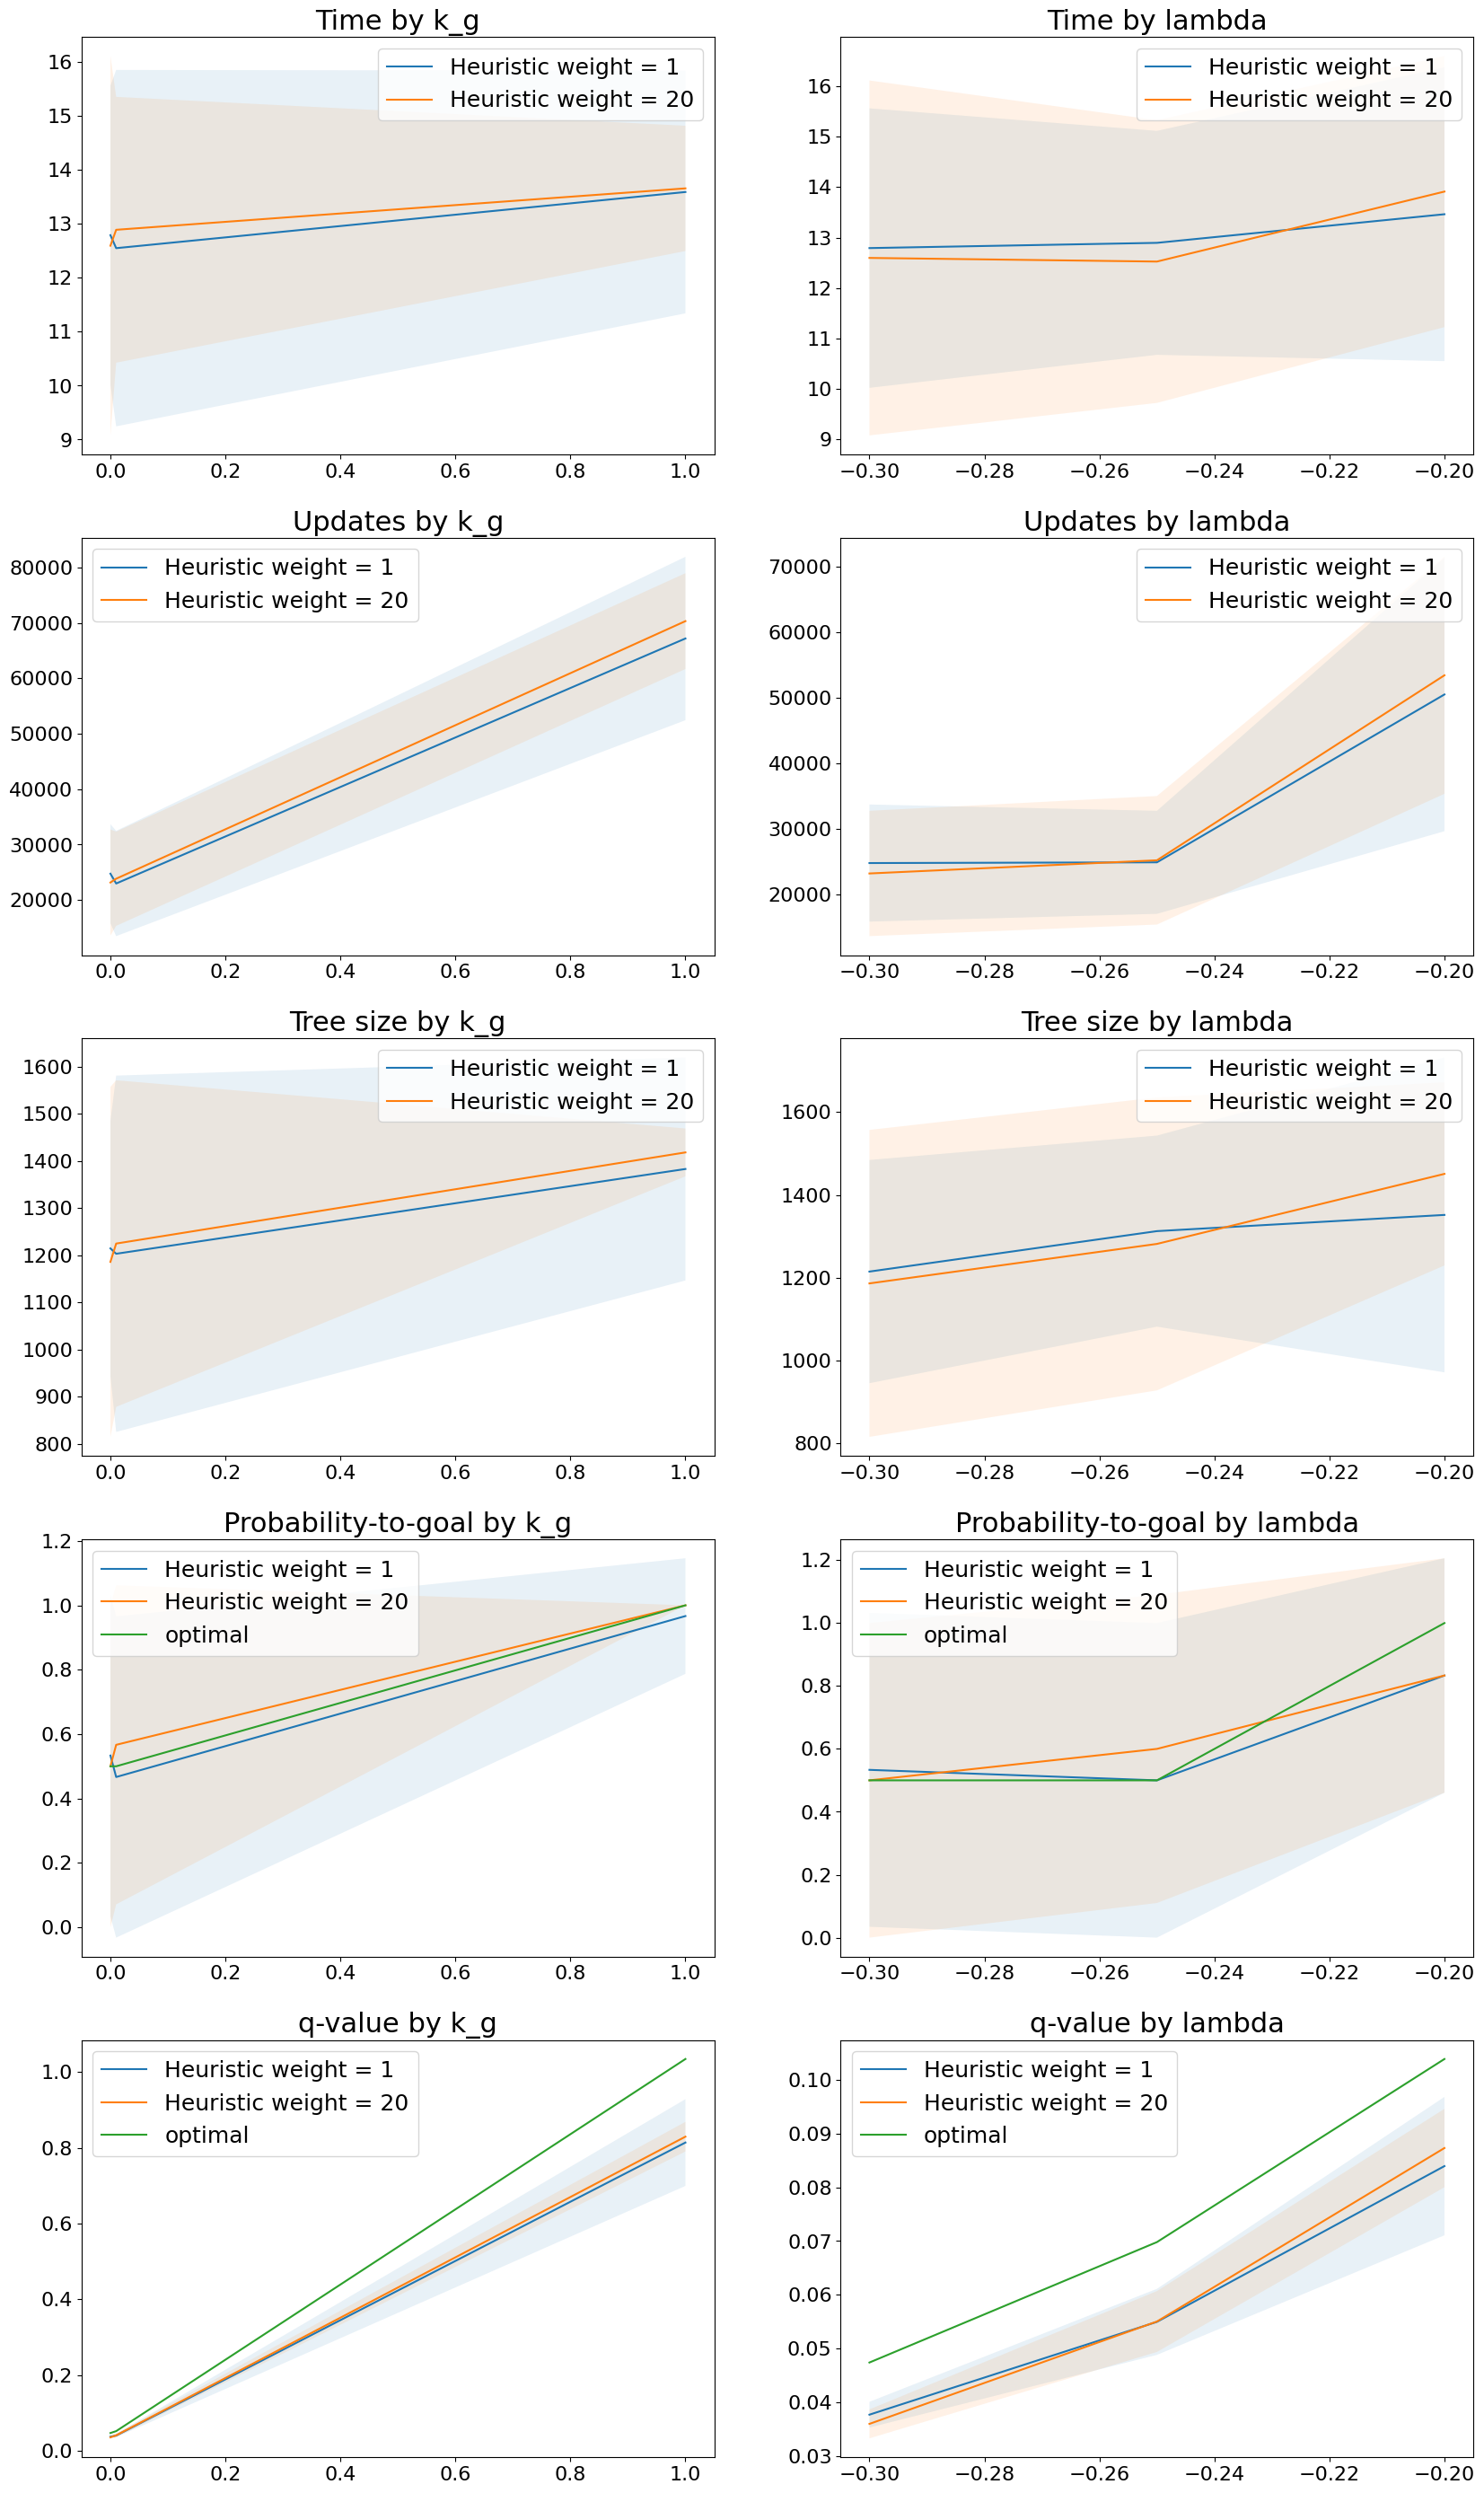

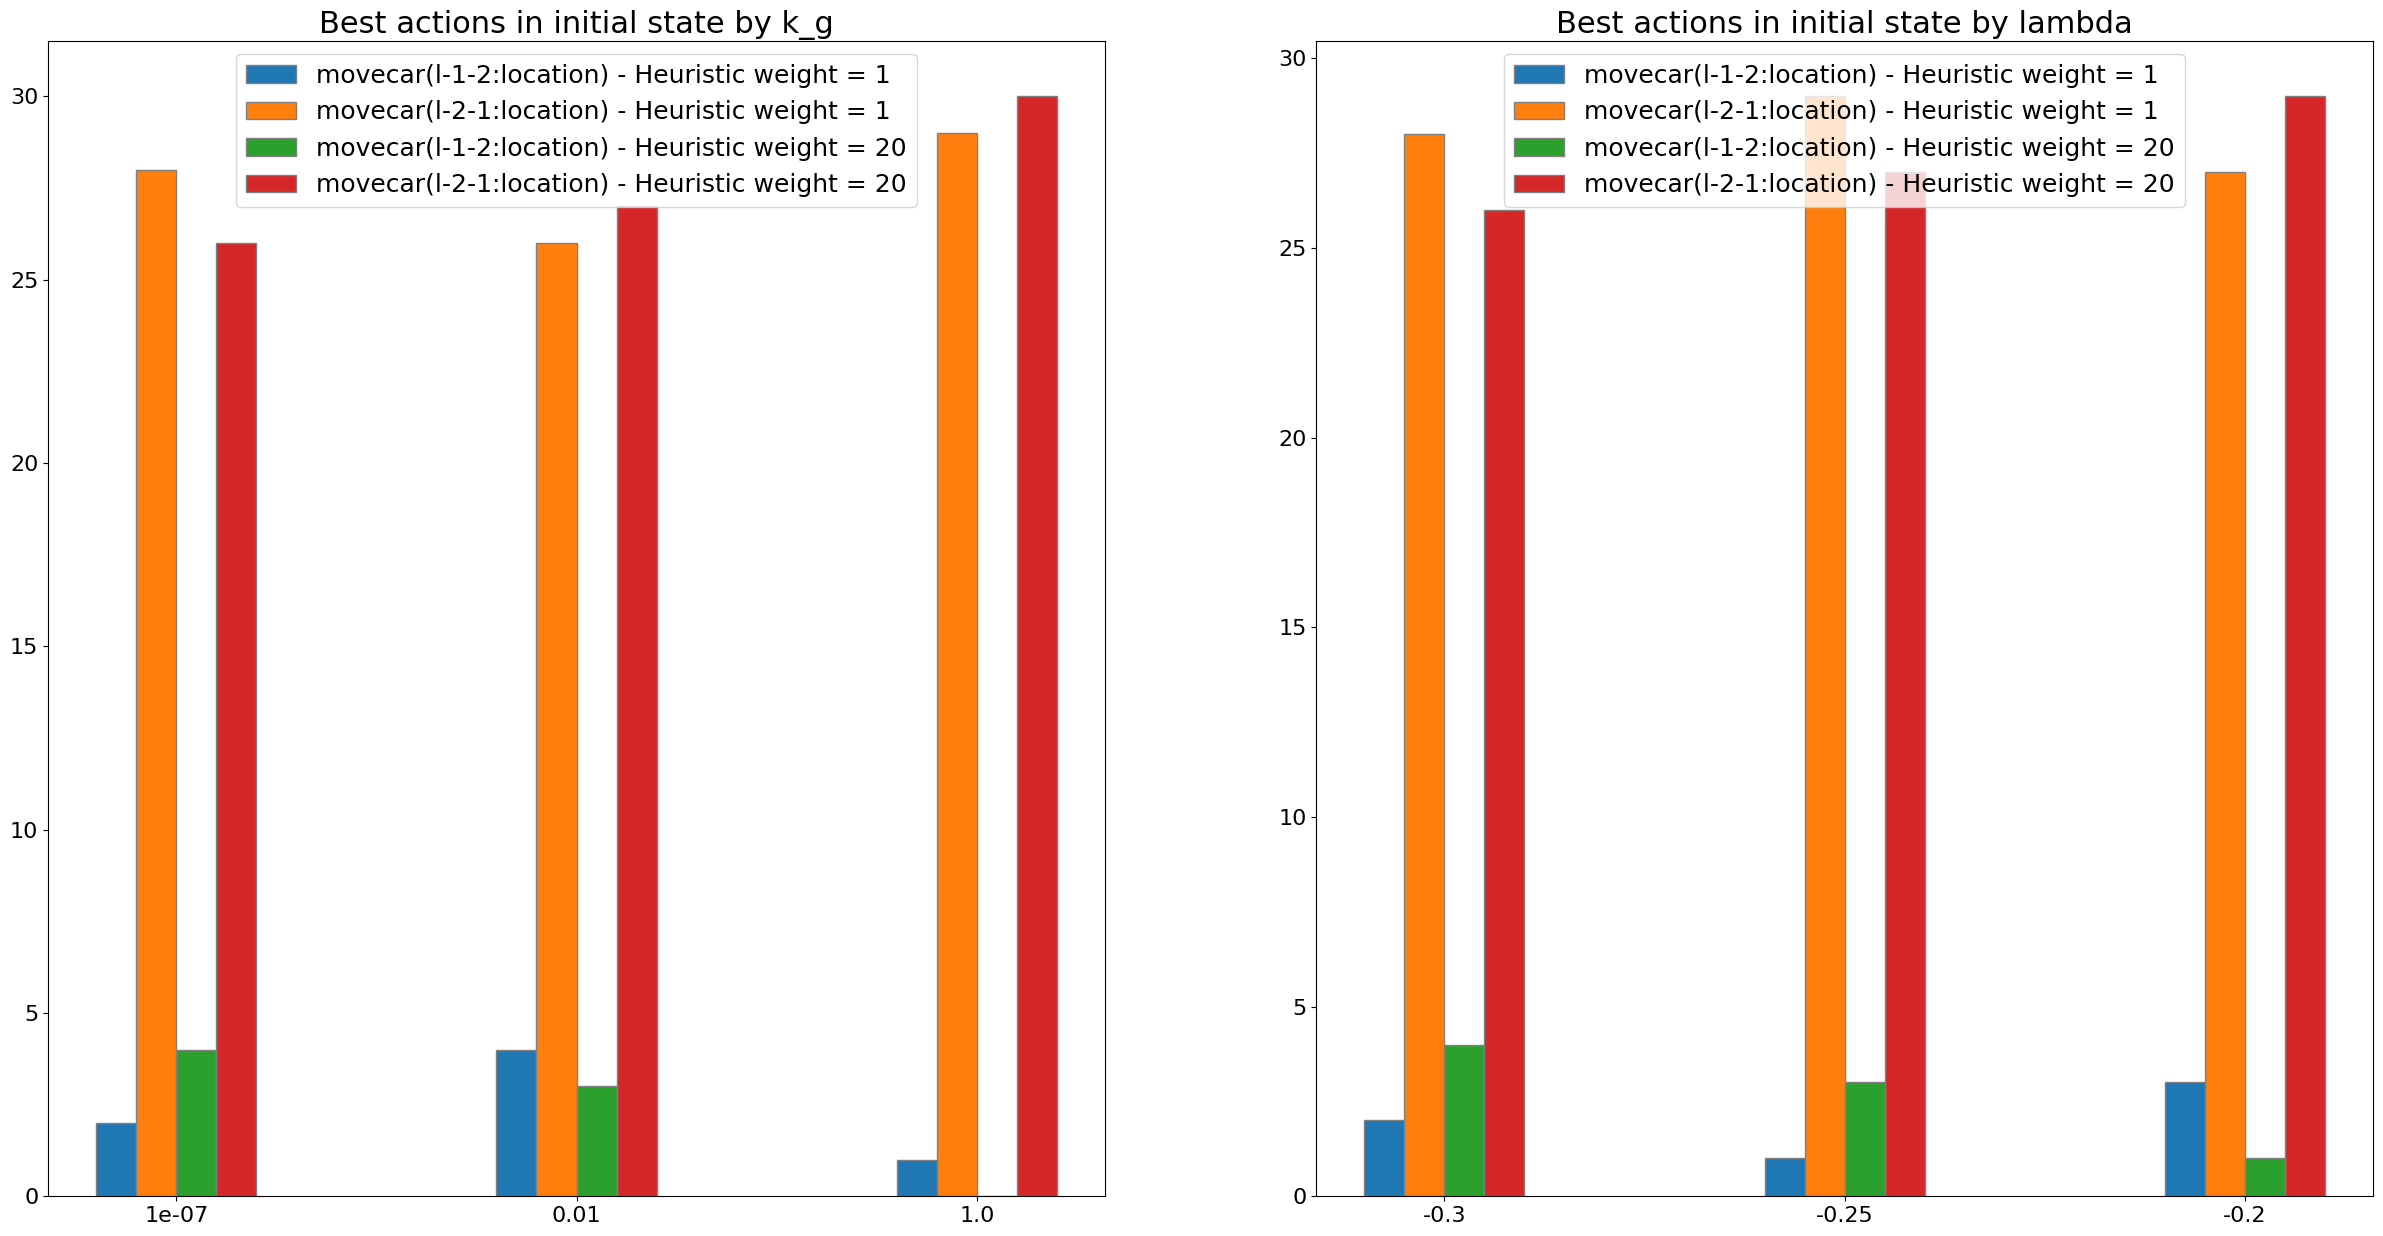

In [15]:
# fix k_g and leave lambda as variable
y_vars = [
    ("cpu_times", "line"),
    ("n_updates", "line"),
    ("tree_sizes", "line"),
    ("found_goal", "line"),
    ("values_s0", "line"),
    ("best_actions_s0", "bar")
]

source_runs = [
    h_init_count_1_runs,
    h_init_count_20_runs,
]


plot_data_lamb = common.get_plot_data_by_fixed_var_from_sources(
    "args.lamb", -0.3,
    "args.k_g", y_vars,
    source_runs
)

(
    sources_lambda_fixed_time,
    sources_lambda_fixed_n_updates,
    sources_lambda_fixed_size,
    sources_lambda_fixed_prob,
    sources_lambda_fixed_q,
    _sources_lamb_best_actions
) = common.get_plot_source_from_plot_data(plot_data_lamb)
sources_lamb_best_actions = common.parse_best_actions_plot_source(_sources_lamb_best_actions)
print("eita by kg")
pprint(_sources_lamb_best_actions)
print()
pprint(sources_lamb_best_actions)
print("eita fim")

plot_data_kg = common.get_plot_data_by_fixed_var_from_sources(
    "args.k_g", 1e-7,
    "args.lamb", y_vars,
    source_runs
)

(
    sources_kg_fixed_time,
    sources_kg_fixed_n_updates,
    sources_kg_fixed_size,
    sources_kg_fixed_prob,
    sources_kg_fixed_q,
    _sources_kg_best_actions
) = common.get_plot_source_from_plot_data(plot_data_kg)
sources_kg_best_actions = common.parse_best_actions_plot_source(_sources_kg_best_actions)

print("eita by lamb")
pprint(_sources_kg_best_actions)
print()
pprint(sources_kg_best_actions)
print("eita fim")

labels = ["Heuristic weight = 1", "Heuristic weight = 20", "optimal"]

titles = [
    ["Time by k_g", "Time by lambda"],
    ["Updates by k_g", "Updates by lambda"],
    ["Tree size by k_g", "Tree size by lambda"],
    ["Probability-to-goal by k_g", "Probability-to-goal by lambda"],
    ["q-value by k_g", "q-value by lambda"]
]

common.plot_multiple_from_plot_data_source_sets(
    [
        [sources_lambda_fixed_time, sources_kg_fixed_time],
        [sources_lambda_fixed_n_updates, sources_kg_fixed_n_updates],
        [sources_lambda_fixed_size, sources_kg_fixed_size],
        [
            sources_lambda_fixed_prob + [(sources_lambda_fixed_prob[-1][0], lamb_opt_probs)],
            sources_kg_fixed_prob + [(sources_kg_fixed_prob[-1][0], kg_opt_probs)]
        ],
        [
            sources_lambda_fixed_q + [(sources_lambda_fixed_q[-1][0], lamb_opt_qs)],
            sources_kg_fixed_q + [(sources_kg_fixed_q[-1][0], kg_opt_qs)]
        ]
    ],
    titles, labels, (5, 2), (20, 35), plot_type="line"
)

actions = _sources_kg_best_actions[0][1]
print("actions:", actions)
# Plot best actions at s0

labels = [
    'movecar(l-1-2:location) - Heuristic weight = 1',
    'movecar(l-2-1:location) - Heuristic weight = 1',
    'movecar(l-1-2:location) - Heuristic weight = 20',
    'movecar(l-2-1:location) - Heuristic weight = 20',
]
titles = [["Best actions in initial state by k_g", "Best actions in initial state by lambda"]]

common.plot_multiple_from_plot_data_source_sets(
    [[sources_lamb_best_actions, sources_kg_best_actions]],
    titles, [labels, labels], (1, 2), (30, 15), bar_width=0.1, plot_type="bar"
)


# Evaluate normalizing

In [16]:
# Evaluate normalizing

base_params = [
    ("args.problem_index", 1), ("args.n_rollouts", 1000),
    ("args.h_init_count", 20), ("args.horizon", 100),
    ("args.h_u", "shortest_path"), ("args.h_p", "handcrafted")
]

norm_runs = common.filter_runs_by_props(info_runs, ("args.norm_exploration_constant", True), *base_params)
no_norm_runs = common.filter_runs_by_props(info_runs, ("args.norm_exploration_constant", False), *base_params)

# check for intersection - shouldn't have any
# ----------------------------------------------------------------
common.check_for_intersections([
    norm_runs,
    no_norm_runs
])
# ----------------------------------------------------------------

print(len(norm_runs), len(no_norm_runs))

9 9


actions: ['movecar(l-1-2:location)', 'movecar(l-2-1:location)']
  sub[2]: [[4, 3, 0], [26, 27, 30]] 2 [0, 0, 0]
  sub[2]: [[14, 10, 0], [16, 20, 30]] 2 [0, 0, 0]
actions: ['movecar(l-1-2:location)', 'movecar(l-2-1:location)']
  sub[2]: [[4, 3, 1], [26, 27, 29]] 2 [0, 0, 0]
  sub[2]: [[14, 3, 0], [16, 27, 30]] 2 [0, 0, 0]
eita by kg
[(array([1.e-07, 1.e-02, 1.e+00]),
  ['movecar(l-1-2:location)', 'movecar(l-2-1:location)'],
  [[4, 3, 0], [26, 27, 30]]),
 (array([1.e-07, 1.e-02, 1.e+00]),
  ['movecar(l-1-2:location)', 'movecar(l-2-1:location)'],
  [[14, 10, 0], [16, 20, 30]])]

[(array([1.e-07, 1.e-02, 1.e+00]),
  [[4, 3, 0], [26, 27, 30], [14, 10, 0], [16, 20, 30]])]
eita fim
eita by lamb
[(array([-0.3 , -0.25, -0.2 ]),
  ['movecar(l-1-2:location)', 'movecar(l-2-1:location)'],
  [[4, 3, 1], [26, 27, 29]]),
 (array([-0.3 , -0.25, -0.2 ]),
  ['movecar(l-1-2:location)', 'movecar(l-2-1:location)'],
  [[14, 3, 0], [16, 27, 30]])]

[(array([-0.3 , -0.25, -0.2 ]),
  [[4, 3, 1], [26, 27, 29], [

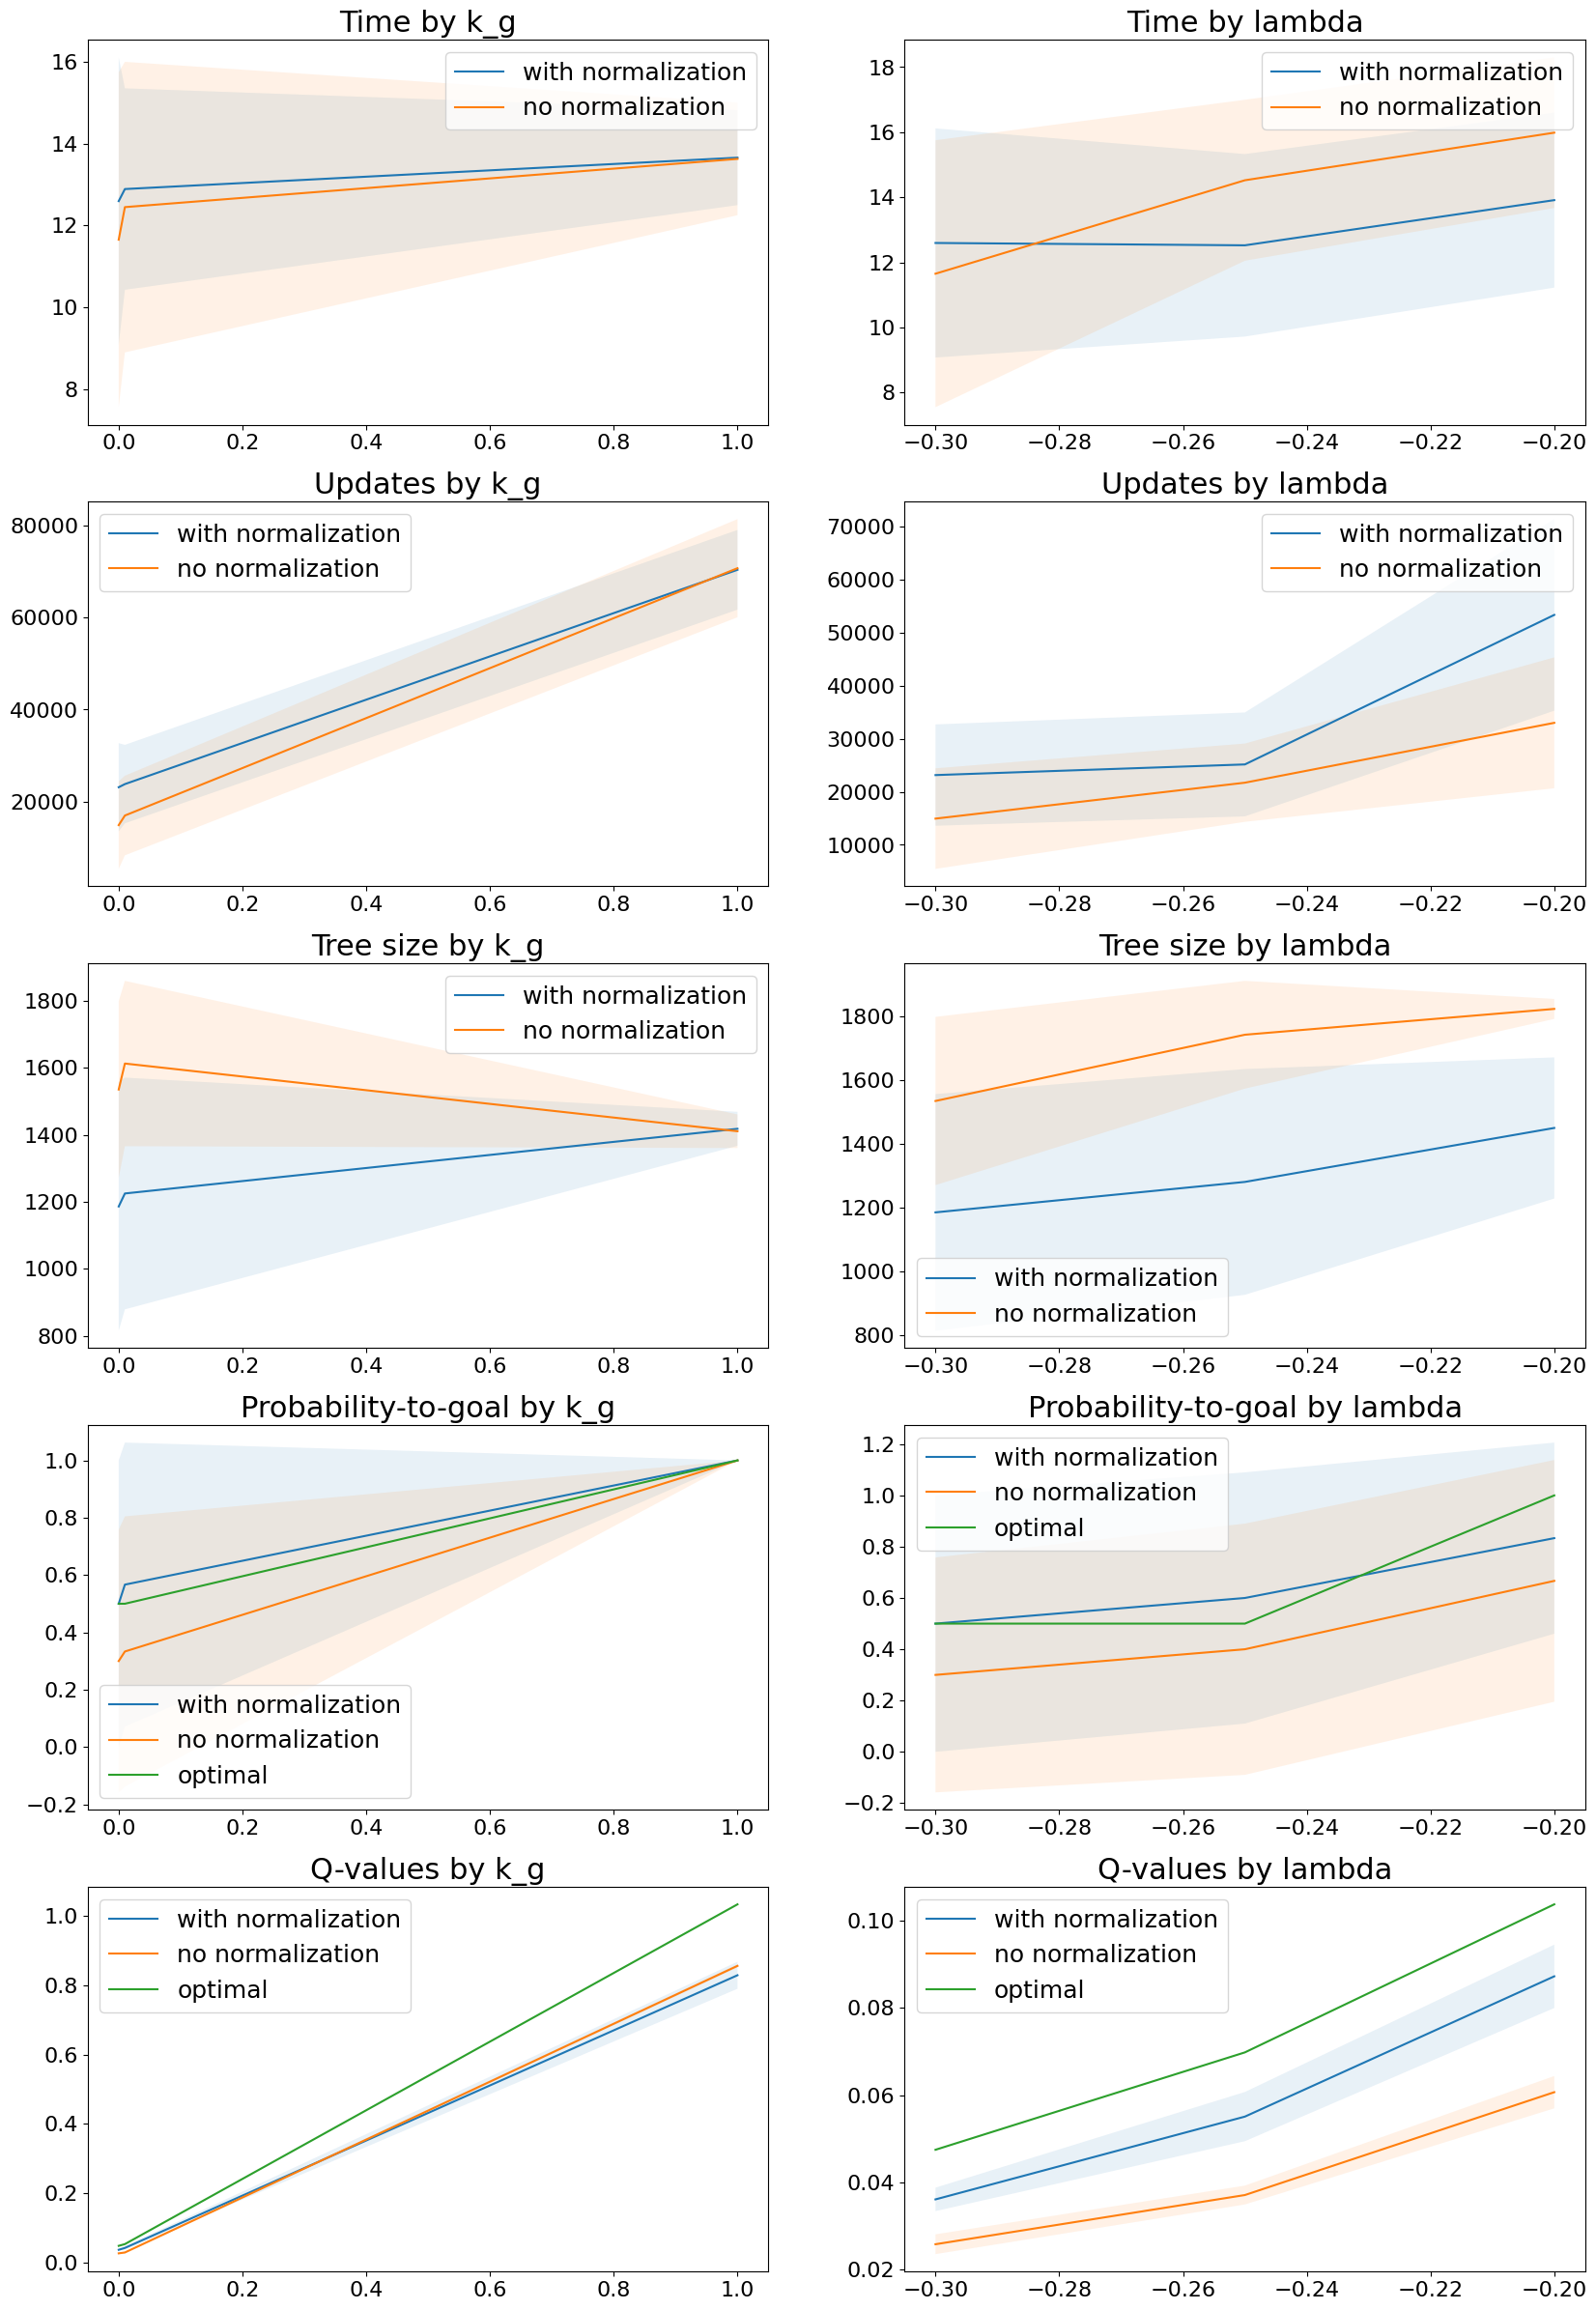

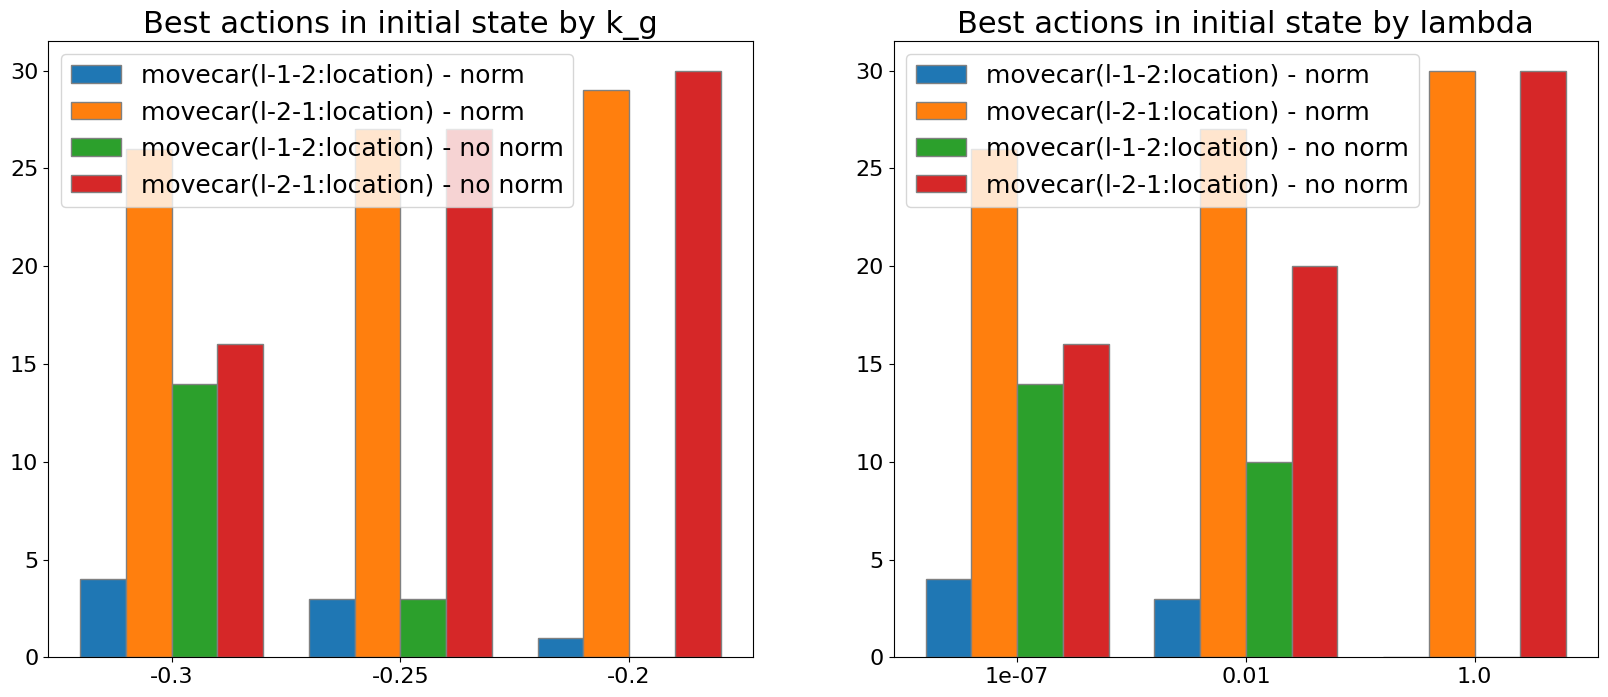

In [17]:
# fix lambda and leave kg as variable

y_vars = [
    ("cpu_times", "line"),
    ("n_updates", "line"),
    ("tree_sizes", "line"),
    ("found_goal", "line"),
    ("values_s0", "line"),
    ("best_actions_s0", "bar")
]
source_runs = [
    norm_runs,
    no_norm_runs
]

plot_datas_by_kg = common.get_plot_data_by_fixed_var_from_sources(
    "args.lamb", -0.3,
    "args.k_g", y_vars,
    source_runs
)

(
    sources_lambda_fixed_time,
    sources_lambda_fixed_n_updates,
    sources_lambda_fixed_size, 
    sources_lambda_fixed_prob, 
    sources_lambda_fixed_qs, 
    _sources_lamb_best_actions
) = common.get_plot_source_from_plot_data(plot_datas_by_kg)
sources_lamb_best_actions = common.parse_best_actions_plot_source(_sources_lamb_best_actions)


# fix k_g and leave lambda as variable
plot_datas_by_lamb = common.get_plot_data_by_fixed_var_from_sources(
    "args.k_g", 1e-7,
    "args.lamb", y_vars,
    source_runs
)

(
    sources_kg_fixed_time,
    sources_kg_fixed_n_updates,
    sources_kg_fixed_size,
    sources_kg_fixed_prob,
    sources_kg_fixed_qs,
    _sources_kg_best_actions
) = common.get_plot_source_from_plot_data(plot_datas_by_lamb)
sources_kg_best_actions = common.parse_best_actions_plot_source(_sources_kg_best_actions)

labels = ["with normalization", "no normalization", "optimal"]
titles = [
    ["Time by k_g", "Time by lambda"],
    ["Updates by k_g", "Updates by lambda"],
    ["Tree size by k_g", "Tree size by lambda"],
    ["Probability-to-goal by k_g", "Probability-to-goal by lambda"],
    ["Q-values by k_g", "Q-values by lambda"],
]

common.plot_multiple_from_plot_data_source_sets([
    [sources_lambda_fixed_time, sources_kg_fixed_time],
    [sources_lambda_fixed_n_updates, sources_kg_fixed_n_updates],
    [sources_lambda_fixed_size, sources_kg_fixed_size],
    [
        sources_lambda_fixed_prob + [(sources_lambda_fixed_prob[-1][0], lamb_opt_probs)],
        sources_kg_fixed_prob + [(sources_kg_fixed_prob[-1][0], kg_opt_probs)]
    ],
    [
        sources_lambda_fixed_qs + [(sources_lambda_fixed_qs[-1][0], lamb_opt_qs)],
        sources_kg_fixed_qs + [(sources_kg_fixed_qs[-1][0], kg_opt_qs)]
    ]
], titles, labels, (5, 2), (20, 30))


print("eita by kg")
pprint(_sources_lamb_best_actions)
print()
pprint(sources_lamb_best_actions)
print("eita fim")

print("eita by lamb")
pprint(_sources_kg_best_actions)
print()
pprint(sources_kg_best_actions)
print("eita fim")


# Plot best actions at s0

labels = [
    'movecar(l-1-2:location) - norm',
    'movecar(l-2-1:location) - norm',
    'movecar(l-1-2:location) - no norm',
    'movecar(l-2-1:location) - no norm',
]
titles = [["Best actions in initial state by k_g", "Best actions in initial state by lambda"]]


# pprint(sources_kg_best_actions)
common.plot_multiple_from_plot_data_source_sets(
    [[sources_kg_best_actions, sources_lamb_best_actions]],
    titles, [labels, labels], (1, 2), (20, 8), bar_width=0.2, plot_type="bar"
)

# Evaluate number of rollouts

In [18]:
# Evaluate normalizing

base_params = [
    ("args.problem_index", 1), ("args.norm_exploration_constant", True),
    ("args.h_init_count", 20), ("args.horizon", 100),
    ("args.h_u", "shortest_path"), ("args.h_p", "handcrafted")
]

n_rollouts_50_runs   = common.filter_runs_by_props(info_runs, ("args.n_rollouts", 50), *base_params)
n_rollouts_100_runs  = common.filter_runs_by_props(info_runs, ("args.n_rollouts", 100), *base_params)
n_rollouts_1000_runs = common.filter_runs_by_props(info_runs, ("args.n_rollouts", 1000), *base_params)

# check for intersection - shouldn't have any
# ----------------------------------------------------------------
common.check_for_intersections([
    n_rollouts_50_runs,
    n_rollouts_100_runs,
    n_rollouts_1000_runs
])
# ----------------------------------------------------------------

print(len(n_rollouts_50_runs), len(n_rollouts_100_runs), len(n_rollouts_1000_runs))

9 9 9


actions: ['movecar(l-1-2:location)', 'movecar(l-2-1:location)']
  sub[2]: [[11, 7, 10], [19, 23, 20]] 2 [0, 0, 0]
  sub[2]: [[6, 12, 10], [24, 18, 20]] 2 [0, 0, 0]
  sub[2]: [[4, 3, 0], [26, 27, 30]] 2 [0, 0, 0]
actions: ['movecar(l-1-2:location)', 'movecar(l-2-1:location)']
  sub[2]: [[11, 12, 6], [19, 18, 24]] 2 [0, 0, 0]
  sub[2]: [[6, 6, 10], [24, 24, 20]] 2 [0, 0, 0]
  sub[2]: [[4, 3, 1], [26, 27, 29]] 2 [0, 0, 0]


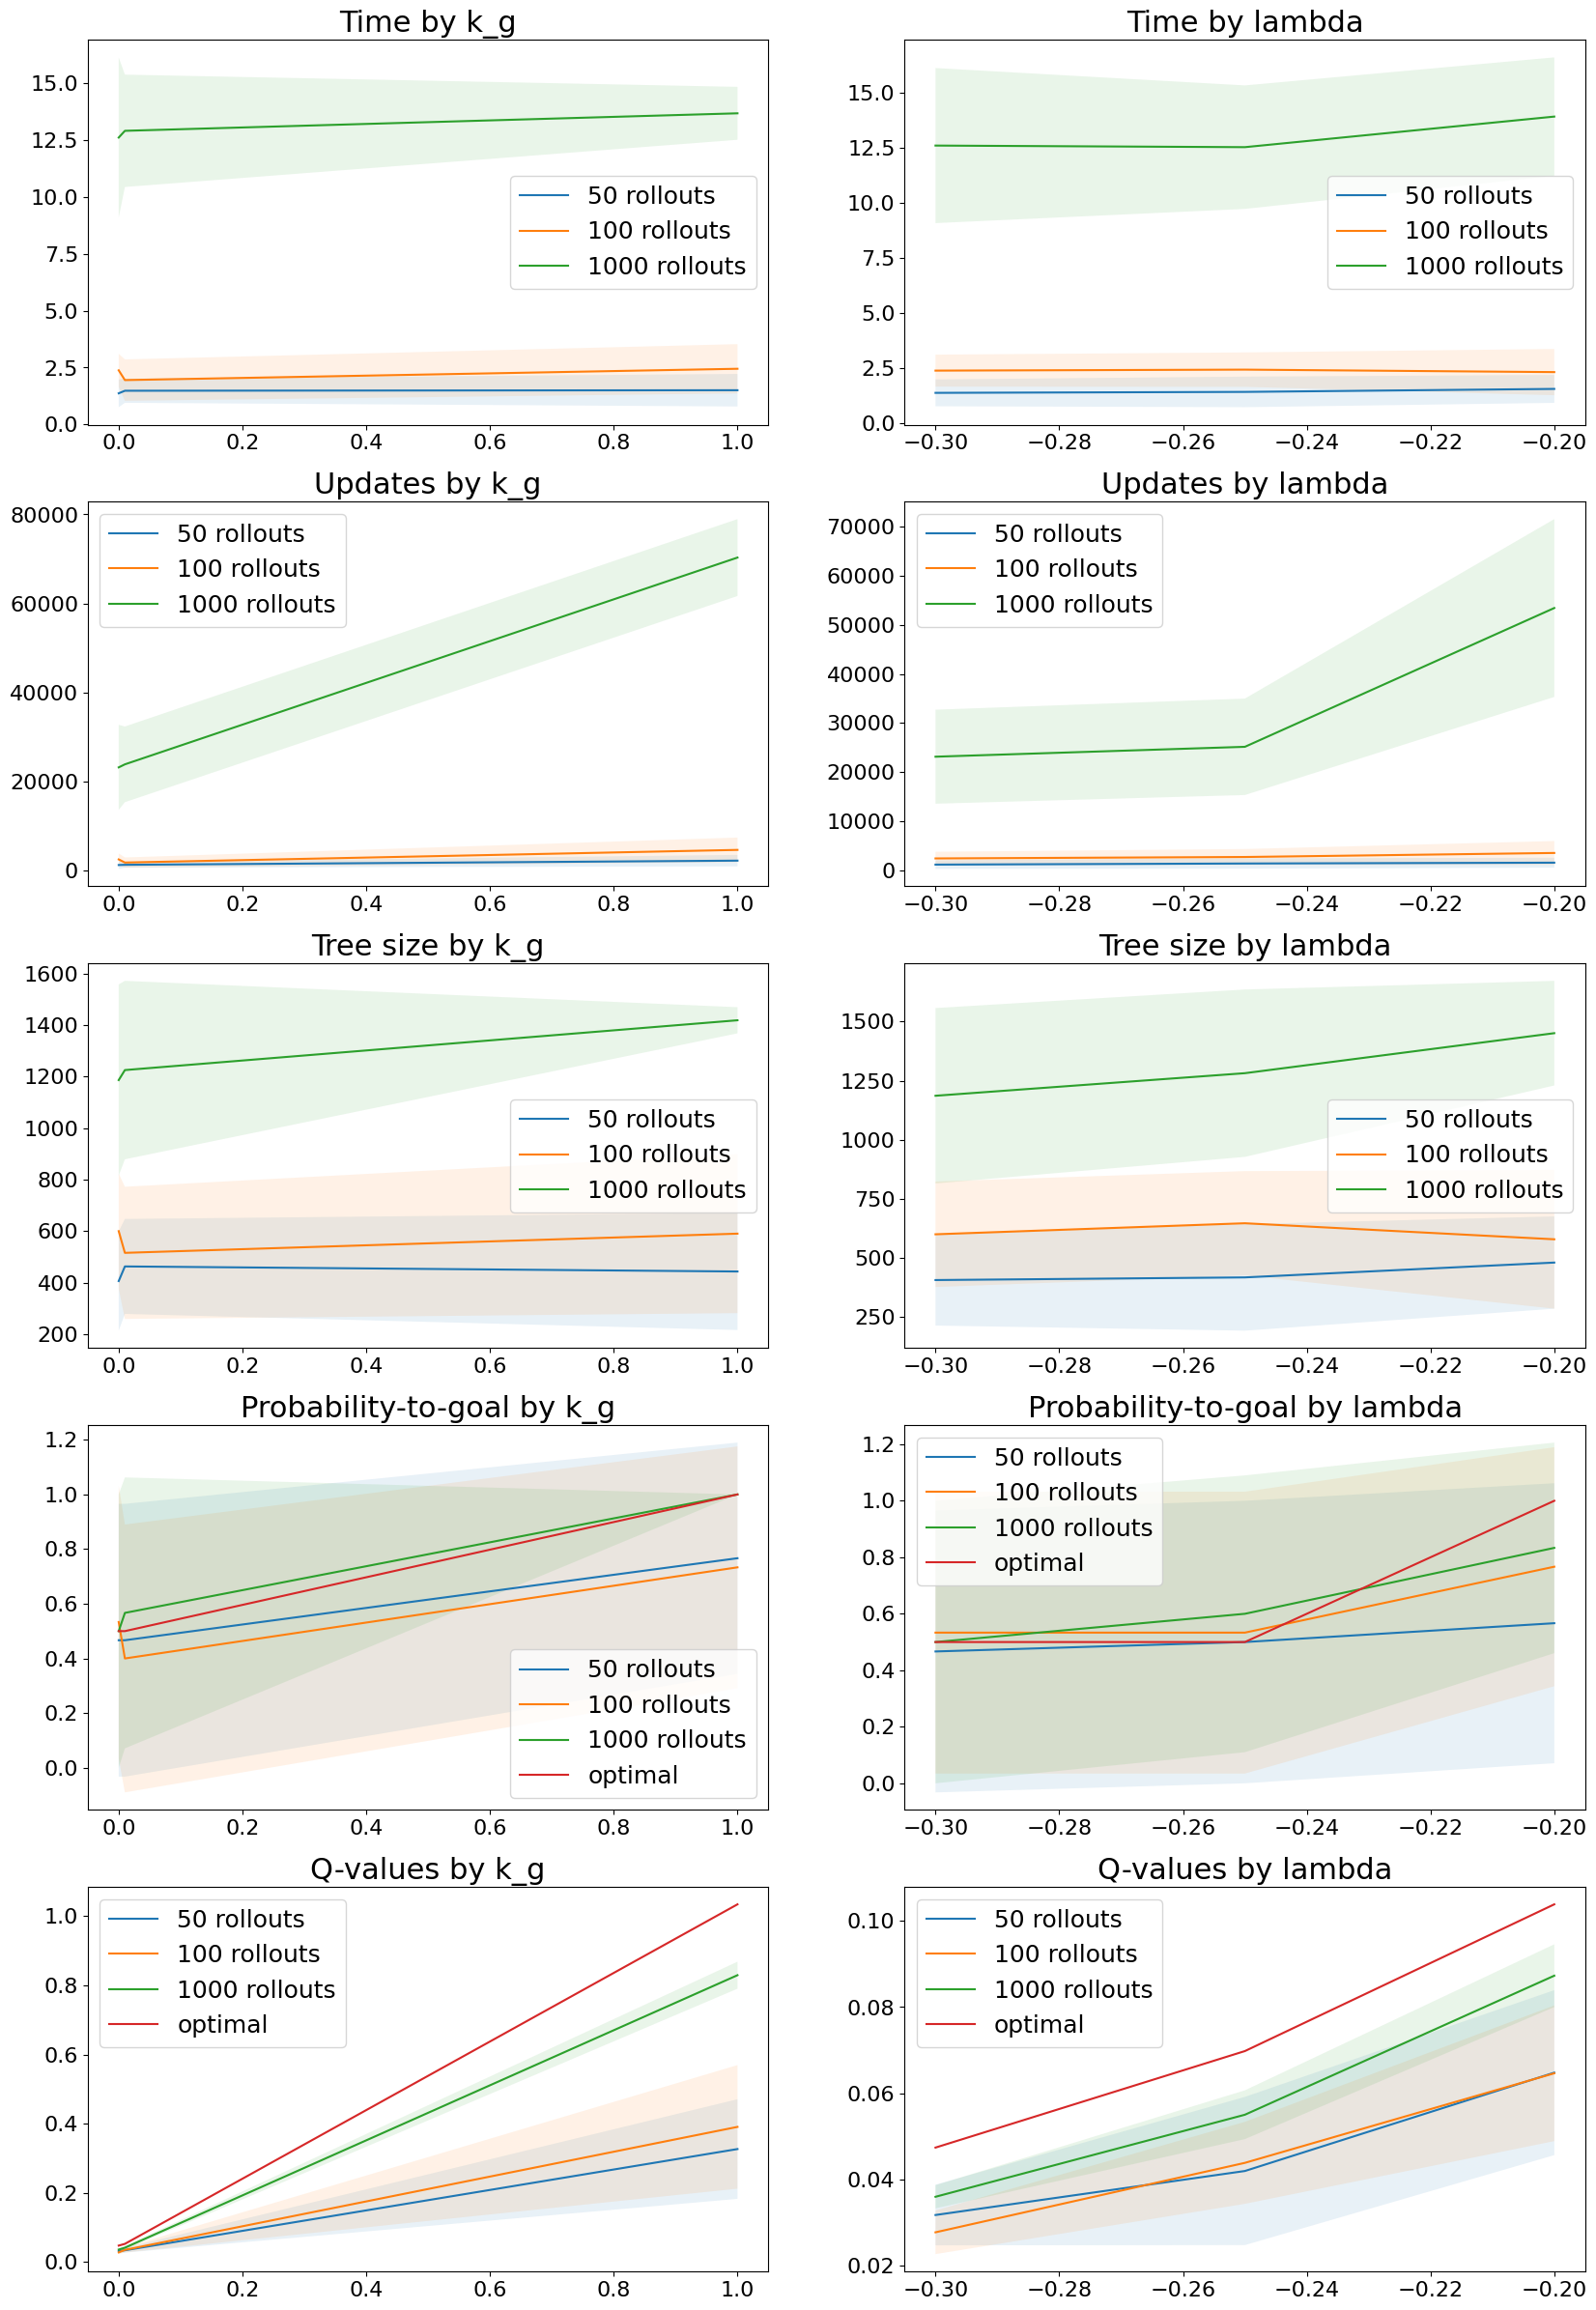

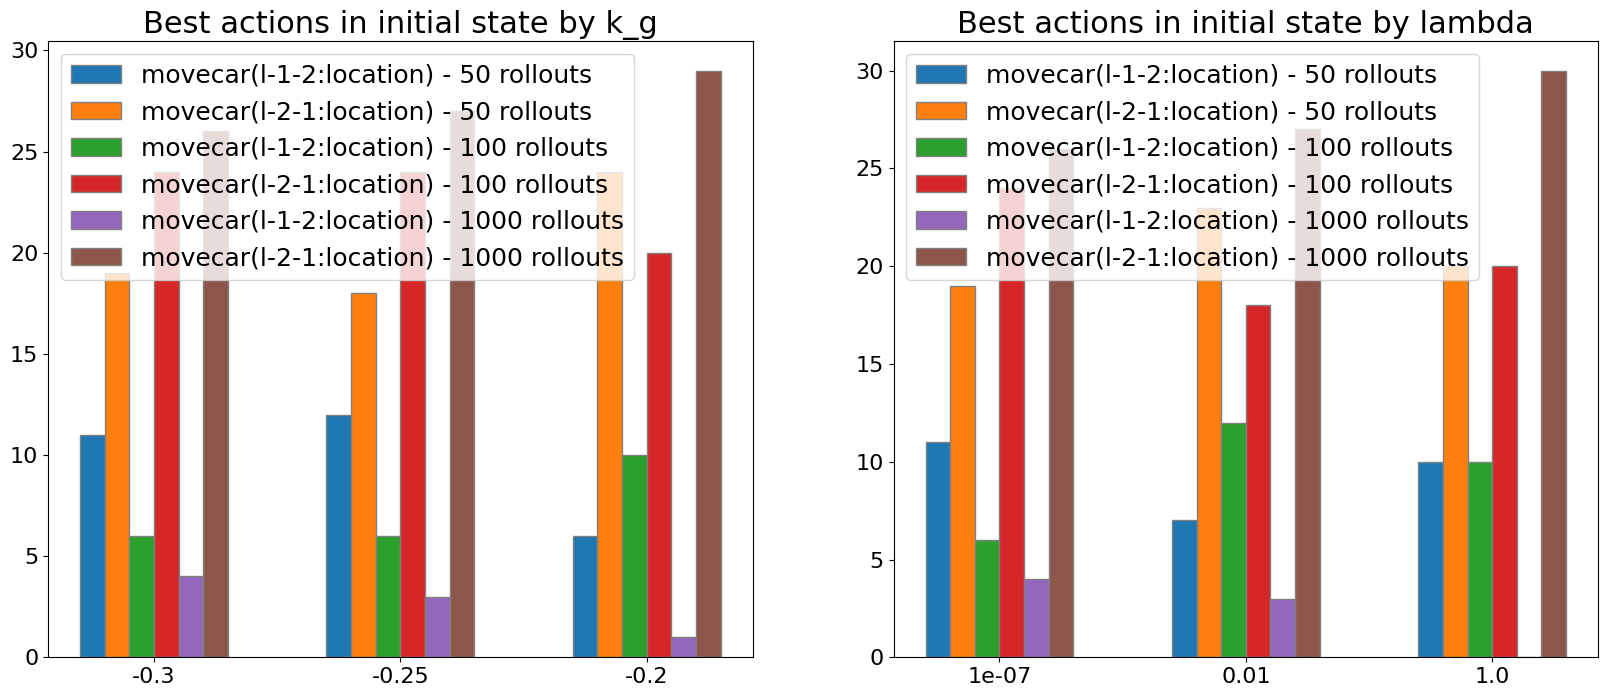

In [19]:
# fix lambda and leave kg as variable

y_vars = [
    ("cpu_times", "line"),
    ("n_updates", "line"),
    ("tree_sizes", "line"),
    ("found_goal", "line"),
    ("values_s0", "line"),
    ("best_actions_s0", "bar")
]

source_runs = [
    n_rollouts_50_runs,
    n_rollouts_100_runs,
    n_rollouts_1000_runs
]

# fix lambda and leave k_g as variable
plot_datas_by_kg = common.get_plot_data_by_fixed_var_from_sources(
    "args.lamb", -0.3,
    "args.k_g", y_vars,
    source_runs
)

# fix k_g and leave lambda as variable
plot_datas_by_lamb = common.get_plot_data_by_fixed_var_from_sources(
    "args.k_g", 1e-7,
    "args.lamb", y_vars,
    source_runs
)

(
    sources_lambda_fixed_time,
    sources_lambda_fixed_n_updates,
    sources_lambda_fixed_size, 
    sources_lambda_fixed_prob, 
    sources_lambda_fixed_qs, 
    _sources_lamb_best_actions
) = common.get_plot_source_from_plot_data(plot_datas_by_kg)
sources_lamb_best_actions = common.parse_best_actions_plot_source(_sources_lamb_best_actions)

(
    sources_kg_fixed_time,
    sources_kg_fixed_n_updates,
    sources_kg_fixed_size,
    sources_kg_fixed_prob,
    sources_kg_fixed_qs,
    _sources_kg_best_actions
) = common.get_plot_source_from_plot_data(plot_datas_by_lamb)
sources_kg_best_actions = common.parse_best_actions_plot_source(_sources_kg_best_actions)


labels = ["50 rollouts", "100 rollouts", "1000 rollouts", "optimal"]
titles = [
    ["Time by k_g", "Time by lambda"],
    ["Updates by k_g", "Updates by lambda"],
    ["Tree size by k_g", "Tree size by lambda"],
    ["Probability-to-goal by k_g", "Probability-to-goal by lambda"],
    ["Q-values by k_g", "Q-values by lambda"]
]
common.plot_multiple_from_plot_data_source_sets([
    [sources_lambda_fixed_time, sources_kg_fixed_time],
    [sources_lambda_fixed_n_updates, sources_kg_fixed_n_updates],
    [sources_lambda_fixed_size, sources_kg_fixed_size],
    [
        sources_lambda_fixed_prob + [(sources_lambda_fixed_prob[-1][0], lamb_opt_probs)],
        sources_kg_fixed_prob + [(sources_kg_fixed_prob[-1][0], kg_opt_probs)]
    ],
    [
        sources_lambda_fixed_qs + [(sources_lambda_fixed_qs[-1][0], lamb_opt_qs)],
        sources_kg_fixed_qs + [(sources_kg_fixed_qs[-1][0], kg_opt_qs)]
    ]
], titles, labels, (5, 2), (20, 30))

labels = [
    'movecar(l-1-2:location) - 50 rollouts',
    'movecar(l-2-1:location) - 50 rollouts',
    'movecar(l-1-2:location) - 100 rollouts',
    'movecar(l-2-1:location) - 100 rollouts',
    'movecar(l-1-2:location) - 1000 rollouts',
    'movecar(l-2-1:location) - 1000 rollouts',
]

titles = [["Best actions in initial state by k_g", "Best actions in initial state by lambda"]]

# pprint(sources_kg_best_actions)
common.plot_multiple_from_plot_data_source_sets(
    [[sources_kg_best_actions, sources_lamb_best_actions]],
    titles, [labels, labels], (1, 2), (20, 8), bar_width=0.1, plot_type="bar"
)